In [32]:
import numpy as np
import cv2
kernel_size = 3
ddepth = cv2.CV_16S
#range in python 3.x and xrange in python 2.x
xrange = range
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [33]:
#mount google drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
#Going to the working directory
%cd /content/drive/My Drive/TP4

/content/drive/My Drive/TP4


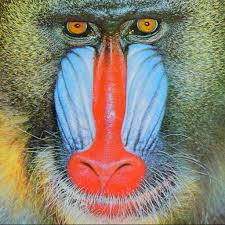

In [35]:
import cv2
#Load the image 'Baboon.jpg'
img = cv2.imread('Baboon.jpg')
cv2_imshow(img)

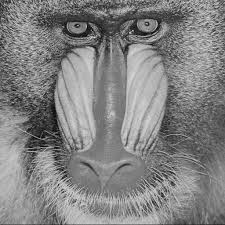

In [36]:
#Load the image in grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_img)

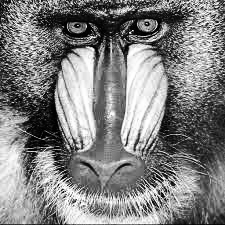

In [37]:
#Applying histogram equalization to grayscale image
histogram = cv2.equalizeHist(gray_img)
cv2_imshow(histogram)

In [38]:
#Get the rows, columns of histogram equalization image
rows,columns = histogram.shape

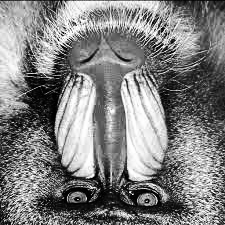

In [39]:
#Remapping image upside down
map = cv2.flip(histogram, 0)
cv2_imshow(map)

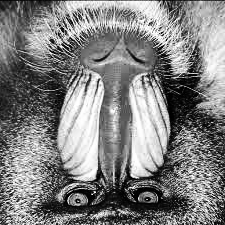

In [40]:
#Reflection in the x direction
Ref = cv2.flip(map, 1)
cv2_imshow(Ref)

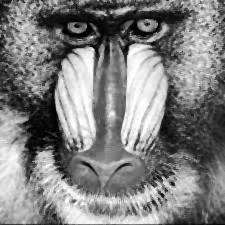

In [41]:
#Median filter
Median = cv2.medianBlur(histogram,3)
cv2_imshow(Median)

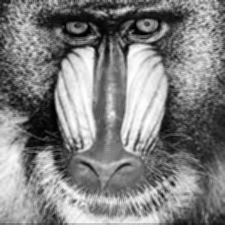

In [42]:
#Gaussian filter
Gaussian = cv2.GaussianBlur(histogram,[3,3],2)
cv2_imshow(Gaussian)


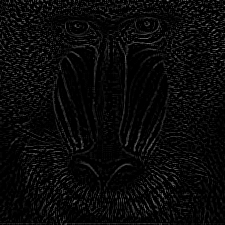

In [43]:
#Applying the Laplacian function to compute the edge image using the Laplace Operator
Laplacian = cv2.Laplacian(Gaussian, 3)
cv2_imshow(Laplacian)

In [109]:
#Apply Sobel Edge Detection

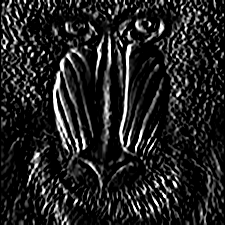

In [64]:
##Compute gradient x for Sobel Edge 
x_gradient = cv2.Sobel(Gaussian, 3, 1, 0)
x_csabs = cv2.convertScaleAbs(x_gradient)
cv2_imshow(x_gradient)

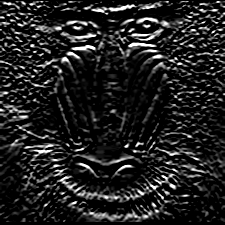

In [65]:
##Compute gradient y for Sobel Edge 
y_gradient = cv2.Sobel(Gaussian, 3, 0 ,1)
y_csabs = cv2.convertScaleAbs(y_gradient)
cv2_imshow(y_gradient)

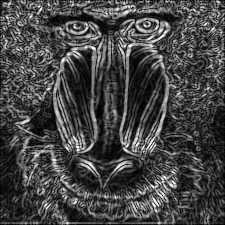

In [66]:
##Total gradient for Sobel Edge 
sobel = cv2.addWeighted(x_csabs, 0.5, y_csabs, 0.5, 0)
cv2_imshow(sobel)

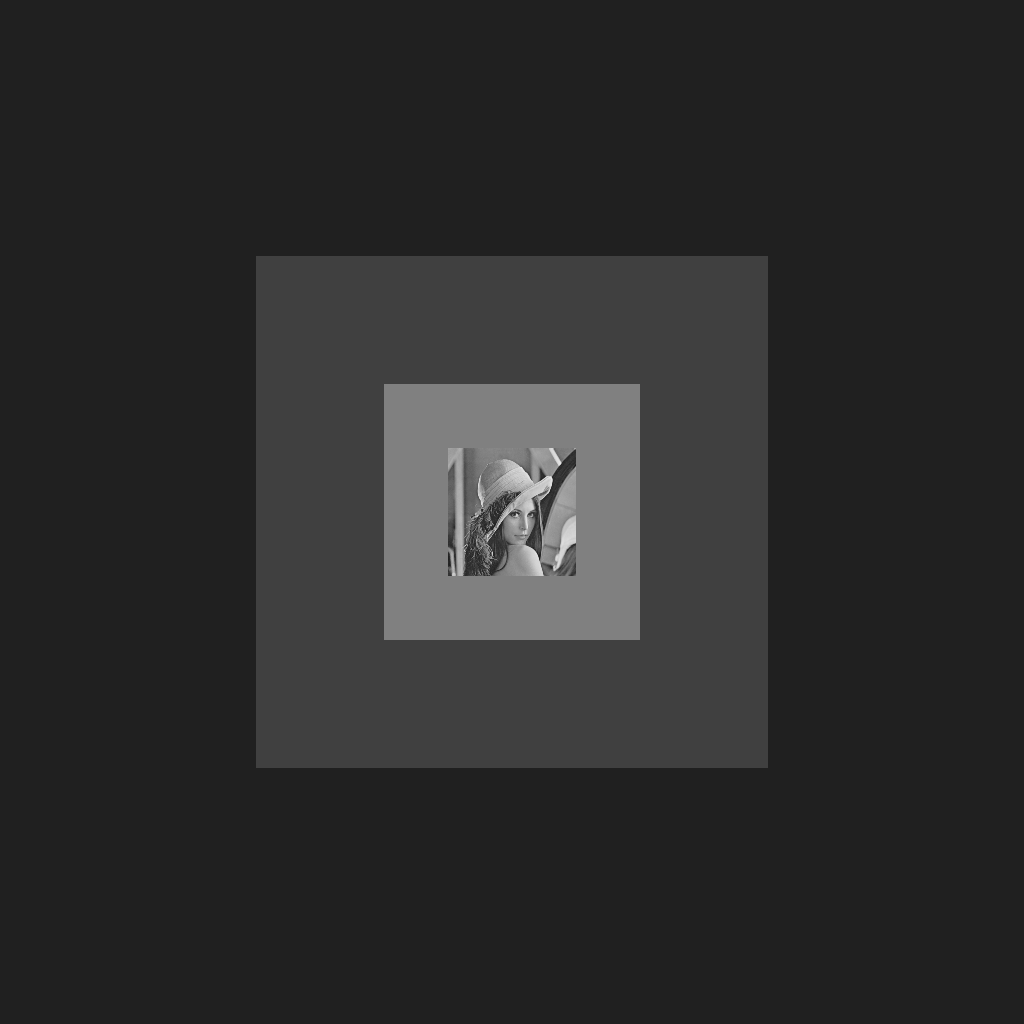

In [76]:
lenna = cv2.imread('Lenna.jpg',0)
lenna = cv2.resize(lenna, [128,128])
size =[32,64,128]
rect = np.ones((1024,1024),dtype=np.uint8)*size[0]
rect[256:768,256:768] = size[1]
rect[384:640,384:640] = size[2]
rect[448:576,448:576] = lenna
cv2_imshow(rect)

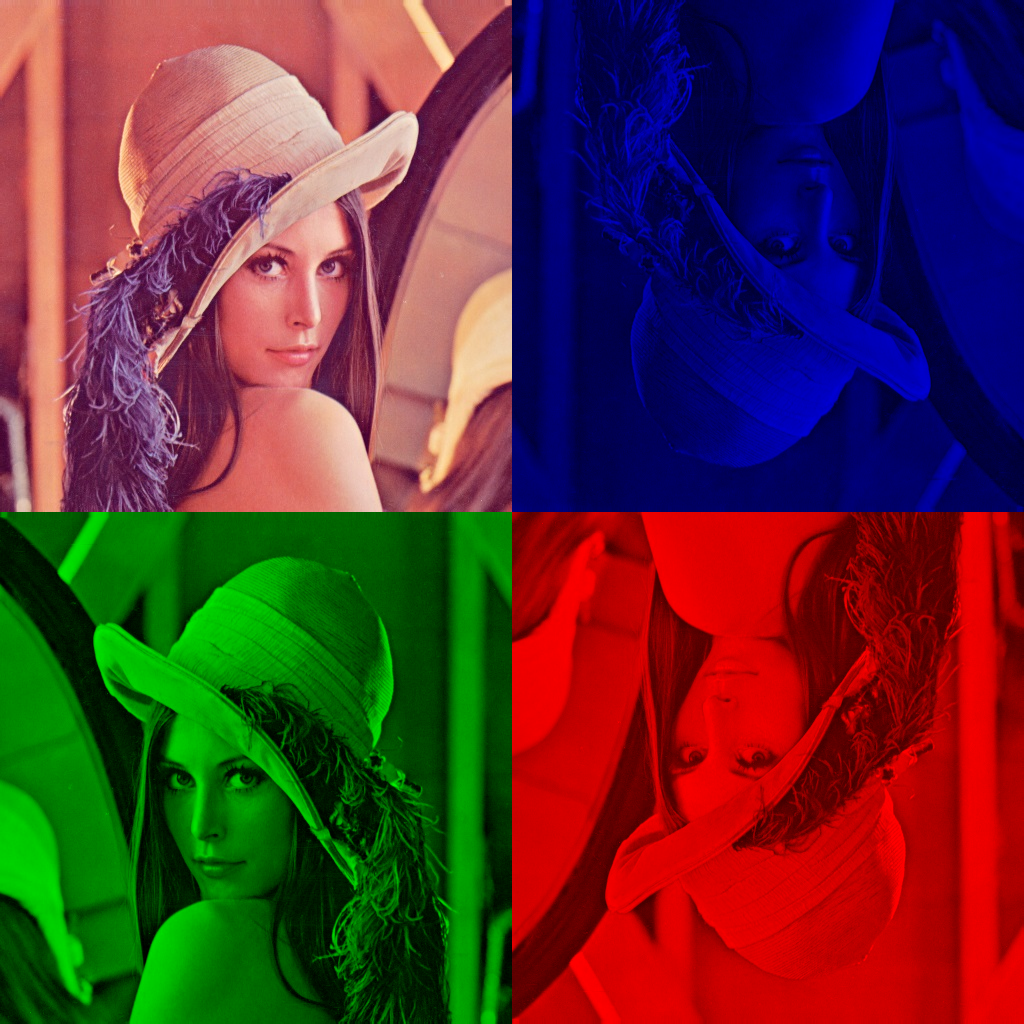

In [108]:

# extract blue channel
blue_channel = lenna[:,:,0]
# create empty image with same shape as that of src image
blue_img = np.zeros(lenna.shape)
#assign the red channel of src to empty image
blue_img[:,:,0] = blue_channel

# extract red channel
red_channel = lenna[:,:,2]
# create empty image with same shape as that of src image
red_img = np.zeros(lenna.shape)
#assign the red channel of src to empty image
red_img[:,:,2] = red_channel


# extract green channel
green_channel = lenna[:,:,1]
# create empty image with same shape as that of src image
green_img = np.zeros(lenna.shape)
#assign the green channel of src to empty image
green_img[:,:,1] = green_channel

bl=cv2.flip(blue_img, 0)
rd=cv2.flip(red_img, -1)
gr=cv2.flip(green_img, 1)
lenna = cv2.imread('Lenna.jpg')


mosaic = np.uint8(np.zeros((1024,1024,3)))
mosaic[0:lenna.shape[0],0:lenna.shape[1]] = lenna
mosaic[512:1024,0:512] = gr
mosaic[512:1024,512:1024] = rd
mosaic[0:512,512:1024] = bl

cv2_imshow(mosaic)
